## 34. 最適化法による違い

公式サンプルコードより

https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html

In [ ]:
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets


# 学習がうまくいかないモデルがあっても、処理を続行させるために使用
import warnings
from sklearn.exceptions import ConvergenceWarning

<font color = blue> **参考 :** </font> MLPClassifierの引数についての解説がされている日本語サイト

https://spjai.com/neural-network-parameter/

In [ ]:
## different learning rate schedules and momentum parameters
params = [
          #{'solver': 'lbfgs'}, ## .loss_curve_ アトリビュートが存在しない
          {'solver': 'sgd', 'learning_rate_init': 0.2, 'learning_rate': 'constant', 'momentum': 0},
          {'solver': 'sgd', 'learning_rate_init': 0.2, 'learning_rate': 'constant', 'momentum': 0.9, 'nesterovs_momentum': False},
          {'solver': 'sgd', 'learning_rate_init': 0.2, 'learning_rate': 'constant', 'momentum': 0.9, 'nesterovs_momentum': True},
          {'solver': 'sgd', 'learning_rate_init': 0.2, 'learning_rate': 'invscaling', 'momentum': 0},
          {'solver': 'sgd', 'learning_rate_init': 0.2, 'learning_rate': 'invscaling', 'momentum': 0.9, 'nesterovs_momentum': True},
          {'solver': 'sgd', 'learning_rate_init': 0.2, 'learning_rate': 'invscaling', 'momentum': 0.9, 'nesterovs_momentum': False},
          {'solver': 'adam', 'learning_rate_init': 0.01}
          ]

In [ ]:
# 図示の際のラベル
labels = [#"lbfgs",
          "constant learning-rate",
          "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate",
          "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum",
          "adam"]

In [ ]:
# 図示の際の線の設定
plot_args = [#{'c': 'orange', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}
             ]

In [ ]:
# モデルのインスタンス作成 -> データを渡して学習実行 -> 学習過程（損失関数）の図示
# の一連の処理を関数化

def plot_on_dataset(X, y, ax, name):
  # for each dataset, plot learning for each learning strategy
  #print("\nlearning on dataset %s" % name)
  print("learning on dataset %s" % name)
  ax.set_title(name)

  X = MinMaxScaler().fit_transform(X)
  mlps = []
  if name == "digits":
    # digits is larger but converges fairly quickly
    max_iter = 15
  else:
    max_iter = 400

  for label, param in zip(labels, params):
    #print("training: %s" % label)
    mlp = MLPClassifier(random_state=0,
                        max_iter=max_iter, **param)
    # some parameter combinations will not converge as can be seen on the
    # plots so they are ignored here
    with warnings.catch_warnings():
      warnings.filterwarnings("ignore", category=ConvergenceWarning,
                              module="sklearn")
      mlp.fit(X, y)

    mlps.append(mlp)
    #print("Training set score: %f" % mlp.score(X, y))
    #print("Training set loss: %f" % mlp.loss_)

  for mlp, label, args in zip(mlps, labels, plot_args):
    ax.plot(mlp.loss_curve_, label=label, **args)

In [ ]:
## load / generate some toy datasets
iris = datasets.load_iris()
X_digits, y_digits = datasets.load_digits(return_X_y=True)

In [ ]:
# ４種類のデータセットでそれぞれ最適化法を比較する
data_sets = [(iris.data, iris.target),
             (X_digits, y_digits),
             datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
             datasets.make_moons(noise=0.3, random_state=0)]

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits', 'circles', 'moons']):
  plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center", fontsize=12)
plt.show()

## 33. keras を使ったネットワーク構築

https://keras.io/getting_started/

### <font color = blue>**4.** </font> CNN : Convolutional Neural Network　続き？改訂？

#### <font color = green> **4.1.** </font> keras.layers.Conv2D の引数

In [ ]:
'''tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding="valid",
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

Arguments

- **filters**: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
- **kernel_size**: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
- **strides**: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width.
- **padding**: one of "valid" or "same" (case-insensitive).
- **data_format**: A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch_size, height, width, channels) while channels_first corresponds to inputs with shape (batch_size, channels, height, width).
- **dilation_rate**: an integer or tuple/list of 2 integers, specifying the dilation rate to use for dilated convolution.
- **groups**: A positive integer specifying the number of groups in which the input is split along the channel axis. Each group is convolved separately with filters / groups filters. The output is the concatenation of all the groups results along the channel axis. Input channels and filters must both be divisible by groups.
- **activation**: Activation function to use. If you don't specify anything, no activation is applied.
- **use_bias**: Boolean, whether the layer uses a bias vector.
- **kernel_initializer**: Initializer for the kernel weights matrix.
- **bias_initializer**: Initializer for the bias vector.
- **kernel_regularizer**: Regularizer function applied to the kernel weights matrix.
- **bias_regularizer**: Regularizer function applied to the bias vector .
- **activity_regularizer**: Regularizer function applied to the output of the layer (its "activation").
- **kernel_constraint**: Constraint function applied to the kernel matrix.
- **bias_constraint**: Constraint function applied to the bias vector .

#### <font color = green> **4.2.** </font> パディング（padding）とストライド（strides）

**図の引用元**

https://qiita.com/nvtomo1029/items/601af18f82d8ffab551e

- パディングなしの場合\
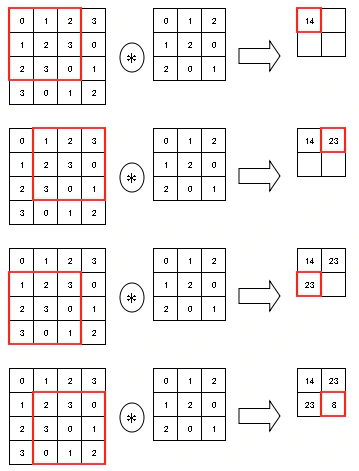

- パディングありの場合\
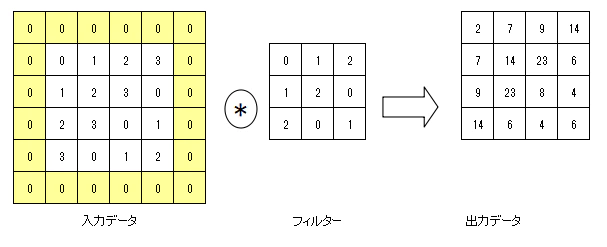

#### <font color = green> **4.3.** </font> サンプルコード　パディングあり

\
$\downarrow \downarrow$ 細かい解説付きのコードがあったのでこちらを引用改変 $\downarrow \downarrow$

https://child-programmer.com/ai/cnn-mnist-basic-samplecode-description/

In [ ]:
############
# ライブラリのインポートなど

import keras
from keras.datasets import mnist       # 0〜9の手書き文字MNISTのデータセット
from keras.models import Sequential    # モデル層を積み重ねる
from keras.layers import Conv2D        # 2次元畳み込み層のモジュール
from keras.layers import MaxPooling2D  # 2次元最大プーリング層のモジュール
from keras.layers import Dense         # 全結合層
from keras.layers import Dropout       # ドロップアウト
from keras.layers import Flatten        # 入力を平滑化（平坦化：次元削減）
from keras.optimizers import Adam     # Adaptive moment estimation : 学習の最適化手法の1つ。最適化関数
import time

In [ ]:
############
# 画像データの読み込みと、データ形式の設定・正規化

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 訓練用画像データ6万枚・テスト用画像データ1万枚
# 縦28×横28ピクセル・グレースケール（白黒画像）
# 各ピクセルは黒から白までの変化を0〜255で表現

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# 「縦28×横28ピクセル」の「グレースケール（白黒）」の「x_train.shape[0]：画像データが6万枚」
# カラー画像の場合は(x_train.shape[0], 28, 28, 3)
# x_train = x_train.reshape(-1, 28, 28, 1) と「-1」を指定すると、適当な値を推測して調整してくれるようです

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
x_train = x_train.astype('float32')/255
# 訓練用の画像データを正規化
# 黒から白までの変化を0〜255で表現しているので、255で割ることでデータを0〜1の範囲に正規化
# float型にすることで実数値で表現
# 正規化前「0〜255」 正規化実施「0.0〜1.0」（実数値）

x_test = x_test.astype('float32')/255

In [ ]:
############
# ラベルデータをOne-hotベクトルに変更

y_train = keras.utils.to_categorical(y_train, 10)
# 訓練用のラベルデータの整数値を2値クラスの行列に変換
# 例「整数 1」を「0,1,0,0,0,0,0,0,0,0」と表現。One-hotベクトル（1-of-k表記法）

# (y_train, 10）：0〜9までのため10クラス
# このような形式にすることで、出力結果が「0.1,0,0,0,0,0,0.8,0,0.1,0」（0の確率10%。6の確率80%。10の確率10%）を得られる
# 画像データが機械学習モデルで、どういう判定結果となっているか？という情報を取得できる

y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
############
# 機械学習（人工知能）モデルの作成
# 「Conv2D」を使ってディープラーニング技術でおなじみの「畳み込みニューラルネットワーク」（CNN）を実装

model = Sequential()
# モデル層を積み重ねる形式の記述方法
# .addメソッドで簡単に層を追加できます

In [ ]:
model.add(Conv2D(16, (3, 3), padding='same',
          input_shape=(28, 28, 1), activation='relu'))
# 空間フィルタ – 畳み込み演算層

# Conv2D(16, (3, 3) : 「3×3」の大きさのフィルタを16枚使うという意味。「5×5」「7×7」などと、中心を決められる奇数が使いやすいようです。
# フィルタ数は、「16・32・64・128・256・512枚」などが使われる傾向にあるようですが、複雑そうな問題ならフィルタ数を多めに、簡単そうな問題ならフィルタ数を少なめで試してみるようです

# padding=’same’ ： 今回は出力画像のサイズが変わらないように「padding=’same’」でパディングを実施
# フィルタを適用前に0などの要素で周囲を増やす（ゼロパディング）
# その他にも「stride=(1,1)」（横に1ピクセル・縦に1ピクセルずつフィルタを適用）などとストライドの追加も可能
# strideを指定しない場合（デフォルト）は縦・横1ピクセルずつフィルタが適用されるようです

# activation=’relu’ ： 活性化関数「ReLU（Rectified Linear Unit）- ランプ関数」
# フィルタ後の画像に実施。入力が0以下の時は出力0。入力が0より大きい場合はそのまま出力する

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))               
# 「2×2」の大きさの最大プーリング層。入力画像内の「2×2」の領域で最大の数値を出力する

In [ ]:
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# 空間フィルタ – 畳み込み演算層。「3×3」の大きさのフィルタを32枚使う。
# （学習時間短縮のため 128 -> 32 と変更した）

In [ ]:
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# （学習時間短縮のため 256 -> 64 と変更した）

model.add(MaxPooling2D(pool_size=(2, 2)))

## さらに畳み込みをしてプーリング

In [ ]:
model.add(Dropout(0.5))                                   
# ドロップアウト – 過学習予防。今回は、全結合の層とのつながりを「50%」無効化しています

In [ ]:
model.add(Flatten())
# 平坦化（次元削減） – 1次元ベクトルに変換する

In [ ]:
model.add(Dense(32, activation='relu'))
# 全結合層。出力32
# （学習時間短縮のため 128 -> 32 と変更した）

In [ ]:
model.add(Dropout(0.25))

## ここでもドロップアウト実行

In [ ]:
model.add(Dense(10, activation='softmax'))
# 全結合層。出力10（0~9の10クラス判定のため）
# Denseのところで、畳み込みニューラルネットワーク（CNN）の最終的な全結合層の出力次元数の決め方は、判定するクラス数を指定します
# 上記のコードの場合「0〜9」までの数字を判定するため、全部で「0・1・2・3・4・5・6・7・8・9」の「10」クラスになります
# そのため、最終的な全結合層の出力次元数を「10」にします
# Softmax関数で総和が1となるように、各出力の予測確率を計算
# 例「0.1,0,0,0,0,0,0.8,0,0,0.1」（0の確率10%。6の確率80%。9の確率10%）

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

In [ ]:
############
#5 損失関数・最適化関数・評価関数などを指定してモデルをコンパイル

model.compile(loss='categorical_crossentropy',  # 損失化関数 – 交差エントロピー誤差を指定。今回のような分類問題（識別問題）などで使われる
              optimizer=Adam(),                # 最適化関数 – Adam（Adaptive moment estimation）を指定。学習の最適化手法の1つ
              metrics=['accuracy']              # 評価関数 – 訓練時とテスト時にモデルにより評価される評価関数。学習の評価として正解率も計算
              )

In [ ]:
############
# 学習の実行

# 処理を始めた時間
start_time = time.time()

history = model.ﬁt(x_train, y_train,
                   batch_size=32,   # サブセットに分けて学習する理由 : 学習する際の異常値の影響を小さくするため
                                     # 今回は 1024 -> 32 と変更した
                   epochs=5,        # 学習時間短縮のため、20 -> 5 と変更した
                   verbose=1,       # ログ出力の指定。「0」だとログが出ない
                   validation_data=(x_test, y_test)
                   )

model_fit_time = time.time() - start_time
print('Computation time:{0:.3f} sec'.format(model_fit_time))
# 計算処理にかかった時間を表示
# {0:.3f} ： {通し番号：float型の小数点以下3桁まで表示}

In [ ]:
############
# モデルの評価

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
# score[0] – テストデータの交差エントロピー誤差を表示

print('Test accuracy:', score[1])
# score[1] – テストデータの正解率を表示

#### <font color = green> **4.4.** </font> パディングなしの場合の計算時間/精度を比較

In [ ]:
model2 = Sequential()

model2.add(Conv2D(16, (3, 3),
                  padding='valid',  ### 'same' -> 'valid' ###
                  input_shape=(28, 28, 1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))               

model2.add(Conv2D(32, (3, 3), padding='valid', activation='relu'))

model2.add(Conv2D(64, (3, 3), padding='valid', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))                

model2.add(Dropout(0.5))                                   

model2.add(Flatten())

model2.add(Dense(32, activation='relu'))

model2.add(Dropout(0.25))                                 

model2.add(Dense(10, activation='softmax'))

In [ ]:
model2.summary()

In [ ]:
model2.compile(loss='categorical_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy']
               )

In [ ]:
start_time = time.time()

history = model2.ﬁt(x_train, y_train,
                    batch_size=32,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test)
                    )

model2_fit_time = time.time() - start_time
print('Computation time:{0:.3f} sec'.format(model2_fit_time))

In [ ]:
score2 = model2.evaluate(x_test, y_test, verbose=0)

print('padding あり')
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('time:', model_fit_time)

print('\n')
print('padding なし')
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])
print('time:', model2_fit_time)

#### <font color = green> **4.5.** </font> カーネル数を減らして計算時間/精度を比較

In [ ]:
model3 = Sequential()
model3.add(Conv2D(8,  ### 16 -> 8
                  (3, 3), padding='valid', input_shape=(28, 28, 1), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(16, ### 32 -> 16
                  (3, 3), padding='valid', activation='relu'))

model3.add(Conv2D(32, ### 64 -> 32
                  (3, 3), padding='valid', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))                

model3.add(Dropout(0.5))                                   
model3.add(Flatten())

model3.add(Dense(16,  ### 32 -> 32
                 activation='relu'))

model3.add(Dropout(0.25))
model3.add(Dense(10, activation='softmax'))

In [ ]:
model3.summary()

In [ ]:
model3.compile(loss='categorical_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy']
               )

In [ ]:
start_time = time.time()

history = model3.ﬁt(x_train, y_train,
                    batch_size=32,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test)
                    )

model3_fit_time = time.time() - start_time
print('Computation time:{0:.3f} sec'.format(model3_fit_time))

In [ ]:
score3 = model3.evaluate(x_test, y_test, verbose=0)

print('16 -> 32 -> 64 -> 32')
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])
print('time:', model2_fit_time)

print('\n')
print('8 -> 16 -> 32 -> 16')
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])
print('time:', model3_fit_time)

#### <font color = green> **4.6.** </font> kernel（学習したweight）を見てみる

In [ ]:
import numpy as np

In [ ]:
model3.layers

In [ ]:
model3.layers[0].weights

In [ ]:
m3_w = model3.layers[0].get_weights()
print(m3_w[0])  # kernel をnumpy.ndarray形式で取得
print(m3_w[1])  # bias をnumpy.ndarray形式で取得

In [ ]:
model3.layers[0].kernel

In [ ]:
model3.layers[0].bias

In [ ]:
model3.layers[0].kernel.shape

In [ ]:
# 最初の畳み込みに使われる、8枚の(3,3)のkernel　の形を取り出す

m3_k1 = np.array([model3.layers[0].kernel[:,:,:,i] for i in range(8)]).reshape(8,3,3)
m3_k1

In [ ]:
## ヒートマップで可視化してみる

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(16,8))
for i in range(8):
  plt.subplot(2,4,i+1)
  sns.heatmap(m3_k1[i], annot=True, cmap='autumn', vmax=1., vmin=-1.)
plt.show()

In [ ]:
## コントラストをきつくしてみる

plt.figure(figsize=(16,8))
for i in range(8):
  plt.subplot(2,4,i+1)
  sns.heatmap(m3_k1[i], annot=True, cmap='autumn', vmax=.5, vmin=-.5)
plt.show()

### <font color = blue>**3.** </font> ResNet : Residual Network

#### <font color = green> **3.1.** </font> keras.layers.concatenate

https://www.tensorflow.org/api_docs/python/tf/keras/layers/concatenate

In [ ]:
## ResNet の例
from keras import layers

In [ ]:
# 入力層
inputs = layers.Input(shape=(28,28))
flatten = layers.Flatten()(inputs)

# 第１層
dense1 = layers.Dense(1000, activation='relu')(flatten)

# 第２層
dense2 = layers.Dense(100)(dense1)

# 第１層の出力と第2層の出力を合流
merged = layers.concatenate([dense1, dense2])

# 出力層
outputs = layers.Dense(10, activation='softmax')(merged)

RN = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
keras.utils.plot_model(RN, show_shapes=True)

In [ ]:
## 出力が多次元データの層同士を合流させたい場合

# 入力層
inputs = layers.Input(shape=(28,28))

# 第１層
dense1 = layers.Dense(100, activation='relu')(inputs)

# 第２層
dense2 = layers.Dense(200, activation='relu')(dense1)

# 第１層の出力と第2層の出力を合流
merged = layers.concatenate([dense1, dense2])

# 出力層
outputs = layers.Dense(10, activation='softmax')(merged)

RN = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
keras.utils.plot_model(RN, show_shapes=True)

In [ ]:
###########
## ダメな例 ##
###########

# 入力層
inputs = layers.Input(shape=(28,28))
flatten = layers.Flatten()(inputs)

# 第１層
dense1 = layers.Dense(100, activation='relu')(flatten)
reshape1 = layers.Reshape((10,10))(dense1)

# 第２層
dense2 = layers.Dense(200, activation='relu')(reshape1)
reshape2 = layers.Reshape((200,10))(dense2)

# 第１層の出力と第2層の出力を合流
merged = layers.concatenate([reshape1, reshape2])

# 出力層
outputs = layers.Dense(10, activation='softmax')(merged)

RN = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
## 実際に学習させてみる

In [ ]:
## 1.1. より学習データを用意

from tensorflow import keras
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255., x_test / 255.

# 目的変数をone-hot表現へ変換（予測結果がクラスごとの確率になる）
num_classes = 10
y_train_vector = keras.utils.to_categorical(y_train, num_classes)
y_test_vector = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# 入力層
inputs = layers.Input(shape=(28,28))
flatten = layers.Flatten()(inputs)

# 第１層
dense1 = layers.Dense(1000)(flatten)
activation1 = layers.Activation(keras.activations.relu)(dense1)
dropout1 = layers.Dropout(0.2)(activation1)

# 第２層
dense2 = layers.Dense(100)(dropout1)
activation2 = layers.Activation(keras.activations.relu)(dense2)
dropout2 = layers.Dropout(0.2)(activation2)

# 第１層の出口と第2層の出口を合流
merged = layers.concatenate([dropout1, dropout2])

# 出力層
outputs = layers.Dense(10, activation='softmax')(merged)

RN = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
keras.utils.plot_model(RN, show_shapes=True)

In [ ]:
RN.compile(optimizer='adam',
           loss='categorical_crossentropy',
           metrics=['accuracy'])

In [ ]:
fitting_rn = RN.fit(x_train, y_train_vector,
                      epochs=10,  ####
                      validation_data=(x_test,y_test_vector))

# １エポック19秒前後、１０エポックで計3分超かかる

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(fitting_rn.history['accuracy'], c='b')
plt.plot(fitting_rn.history['val_accuracy'], c='r')
plt.show()

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(fitting_rn.history['loss'], c='b')
plt.plot(fitting_rn.history['val_loss'], c='r')
plt.show()

#### <font color = green> **3.2.** </font> keras.layers.add

https://www.tensorflow.org/api_docs/python/tf/keras/layers/add

In [ ]:
# 入力層
inputs = layers.Input(shape=(28,28))
flatten = layers.Flatten()(inputs)

# 第１層
dense1 = layers.Dense(1000, activation='relu')(flatten)
reshape1 = layers.Reshape((10,100))(dense1)

# 第２層
dense2 = layers.Dense(1000)(dense1)
reshape2 = layers.Reshape((10,100))(dense2)

# 第１層の出力と第2層の出力を合流
merged = layers.add([reshape1, reshape2])

# 出力層
flatten2 = layers.Flatten()(merged)
outputs = layers.Dense(10, activation='softmax')(flatten2)

RN = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
keras.utils.plot_model(RN, show_shapes=True)

In [ ]:
RN.compile(optimizer='adam',
           loss='categorical_crossentropy',
           metrics=['accuracy'])

In [ ]:
fitting_rn = RN.fit(x_train, y_train_vector,
                      epochs=5,  ####
                      validation_data=(x_test,y_test_vector))

# １エポック35秒前後、5エポックで約3分かかる

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(fitting_rn.history['accuracy'], c='b')
plt.plot(fitting_rn.history['val_accuracy'], c='r')
plt.show()

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(fitting_rn.history['loss'], c='b')
plt.plot(fitting_rn.history['val_loss'], c='r')
plt.show()

#### <font color = green> **3.3.** </font> keras.layers.dot

https://www.tensorflow.org/api_docs/python/tf/keras/layers/dot

In [ ]:
# 入力層
inputs = layers.Input(shape=(28,28))
flatten = layers.Flatten()(inputs)

# 第１層
dense1 = layers.Dense(100, activation='relu')(flatten)
reshape1 = layers.Reshape((5,2,2,5))(dense1)  ###

# 第２層
dense2 = layers.Dense(100)(dense1)
reshape2 = layers.Reshape((5,2,5,2))(dense2)  ###

# 第１層の出力と第2層の出力を合流
merged = layers.dot([reshape1, reshape2], axes=(1,1))

# 出力層
flatten2 = layers.Flatten()(merged)
outputs = layers.Dense(10, activation='softmax')(flatten2)

RN = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
keras.utils.plot_model(RN, show_shapes=True)

In [ ]:
RN.compile(optimizer='adam',
           loss='categorical_crossentropy',
           metrics=['accuracy'])

In [ ]:
fitting_rn = RN.fit(x_train, y_train_vector,
                      epochs=10,  ####
                      validation_data=(x_test,y_test_vector))

# １エポック6秒前後、１０エポックで約1分かかる

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(fitting_rn.history['accuracy'], c='b')
plt.plot(fitting_rn.history['val_accuracy'], c='r')
plt.show()

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(fitting_rn.history['loss'], c='b')
plt.plot(fitting_rn.history['val_loss'], c='r')
plt.show()

#### <font color = red> **task** </font> ResNetを作ってみる

### <font color = blue>**5.** </font> RNN : Recurrent Neural Network

https://keras.io/api/layers/recurrent_layers/rnn/

#### Base RNN layer

- 数値の時系列データなどのシーケンシャルデータのパターンを認識するように設計されたニューラルネットワークのモデル
- 入力値と出力値に可変長のシーケンシャルデータを扱うことができるネットワーク構造をしています

In [ ]:
tf.keras.layers.RNN(
    cell,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,
    time_major=False,
    **kwargs
)

#### SimpleRNN layer

- 提案者の名前から通称Elman/Jordan netと呼ばれるRNNの一種


In [ ]:
tf.keras.layers.SimpleRNN(
    units,
    activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,
    **kwargs
)

#### LSTM : Long Short-Term Memory

- ある状態の中間層の出力値を次の状態に順伝播するネットワーク

In [ ]:
'''tf.keras.layers.LSTM(
    units,
    activation="tanh",
    recurrent_activation="sigmoid",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    time_major=False,
    unroll=False,
    **kwargs
)

#### Bidirectional layer

- 過去の情報だけでなく、未来の情報を加味することで精度を向上させるためのモデル
- 一般的なRNNでは、過去から未来のみの情報で学習しますが、Bidirectional RNNは未来から過去の方向でも同時に学習します

In [ ]:
'''tf.keras.layers.Bidirectional(
    layer,
    merge_mode="concat", 
    weights=None, 
    backward_layer=None, 
    **kwargs
)

#### GRU : Gated recurrent unit

- GRUは忘却ゲートを持つLSTMに似ているが、出力ゲートを欠くためLSTMよりもパラメータが少ない
- 多声音楽モデリングおよび音声シグナルモデリングの特定の課題におけるGRUの性能は、LSTMの性能と類似していることが明らかにされている。
- GRUは特定のより小さなデータセットではもっと良い性能を示すことが明らかにされている

In [ ]:
'''tf.keras.layers.GRU(
    units,
    activation="tanh",
    recurrent_activation="sigmoid",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,
    time_major=False,
    reset_after=True,
    **kwargs
)

#### 公式サンプルコード

https://keras.io/guides/working_with_rnns/

- Authors: Scott Zhu, Francois Chollet
- Date created: 2019/07/08
- Last modified: 2020/04/14
- Description: Complete guide to using & customizing RNN layers.

In [ ]:
## Setup

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
##########
## 様々なモデルの構築例

In [ ]:
## Built-in RNN layers: a simple example

model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(layers.Dense(10))

model.summary()

In [ ]:
## Outputs and states

model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.summary()

In [ ]:
encoder_vocab = 1000
decoder_vocab = 2000

encoder_input = layers.Input(shape=(None,))
encoder_embedded = layers.Embedding(input_dim=encoder_vocab, output_dim=64)(
    encoder_input
)

# Return states in addition to output
output, state_h, state_c = layers.LSTM(64, return_state=True, name="encoder")(
    encoder_embedded
)
encoder_state = [state_h, state_c]

decoder_input = layers.Input(shape=(None,))
decoder_embedded = layers.Embedding(input_dim=decoder_vocab, output_dim=64)(
    decoder_input
)

# Pass the 2 states to a new LSTM layer, as initial state
decoder_output = layers.LSTM(64, name="decoder")(
    decoder_embedded, initial_state=encoder_state
)
output = layers.Dense(10)(decoder_output)

model = keras.Model([encoder_input, decoder_input], output)
model.summary()

In [ ]:
## Cross-batch statefulness

paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)

lstm_layer = layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)
output = lstm_layer(paragraph3)

# reset_states() will reset the cached state to the original initial_state.
# If no initial_state was provided, zero-states will be used by default.
lstm_layer.reset_states()

In [ ]:
## Bidirectional RNNs

model = keras.Sequential()

model.add(
    layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(5, 10))
)
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(10))

model.summary()

In [ ]:
## Using CuDNN kernels when available
# NVIDIA のGPU開発環境である CUDA と CUDA を使って Deep Learning の計算を高速で行うためのライブラリである cuDNN 

batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28

units = 64
output_size = 10  # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    # CuDNN is only available at the layer level, and not at the cell level.
    # This means `LSTM(units)` will use the CuDNN kernel,
    # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
    if allow_cudnn_kernel:
        # The LSTM layer with default options uses CuDNN.
        lstm_layer = keras.layers.LSTM(units, input_shape=(None, input_dim))
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = keras.layers.RNN(
            keras.layers.LSTMCell(units), input_shape=(None, input_dim)
        )
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model

In [ ]:
###########
## 学習はここから

In [ ]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
sample, sample_label = x_train[0], y_train[0]

In [ ]:
model = build_model(allow_cudnn_kernel=True)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)


model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1
)

In [ ]:
noncudnn_model = build_model(allow_cudnn_kernel=False)
noncudnn_model.set_weights(model.get_weights())
noncudnn_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)
noncudnn_model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1
)

In [ ]:
import matplotlib.pyplot as plt

with tf.device("CPU:0"):
    cpu_model = build_model(allow_cudnn_kernel=True)
    cpu_model.set_weights(model.get_weights())
    result = tf.argmax(cpu_model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
    print(
        "Predicted result is: %s, target result is: %s" % (result.numpy(), sample_label)
    )
    plt.imshow(sample, cmap=plt.get_cmap("gray"))

In [ ]:
## RNNs with list/dict inputs, or nested inputs

class NestedCell(keras.layers.Layer):
    def __init__(self, unit_1, unit_2, unit_3, **kwargs):
        self.unit_1 = unit_1
        self.unit_2 = unit_2
        self.unit_3 = unit_3
        self.state_size = [tf.TensorShape([unit_1]), tf.TensorShape([unit_2, unit_3])]
        self.output_size = [tf.TensorShape([unit_1]), tf.TensorShape([unit_2, unit_3])]
        super(NestedCell, self).__init__(**kwargs)

    def build(self, input_shapes):
        # expect input_shape to contain 2 items, [(batch, i1), (batch, i2, i3)]
        i1 = input_shapes[0][1]
        i2 = input_shapes[1][1]
        i3 = input_shapes[1][2]

        self.kernel_1 = self.add_weight(
            shape=(i1, self.unit_1), initializer="uniform", name="kernel_1"
        )
        self.kernel_2_3 = self.add_weight(
            shape=(i2, i3, self.unit_2, self.unit_3),
            initializer="uniform",
            name="kernel_2_3",
        )

    def call(self, inputs, states):
        # inputs should be in [(batch, input_1), (batch, input_2, input_3)]
        # state should be in shape [(batch, unit_1), (batch, unit_2, unit_3)]
        input_1, input_2 = tf.nest.flatten(inputs)
        s1, s2 = states

        output_1 = tf.matmul(input_1, self.kernel_1)
        output_2_3 = tf.einsum("bij,ijkl->bkl", input_2, self.kernel_2_3)
        state_1 = s1 + output_1
        state_2_3 = s2 + output_2_3

        output = (output_1, output_2_3)
        new_states = (state_1, state_2_3)

        return output, new_states

    def get_config(self):
        return {"unit_1": self.unit_1, "unit_2": unit_2, "unit_3": self.unit_3}

In [ ]:
## Build a RNN model with nested input/output

unit_1 = 10
unit_2 = 20
unit_3 = 30

i1 = 32
i2 = 64
i3 = 32
batch_size = 64
num_batches = 10
timestep = 50

cell = NestedCell(unit_1, unit_2, unit_3)
rnn = keras.layers.RNN(cell)

input_1 = keras.Input((None, i1))
input_2 = keras.Input((None, i2, i3))

outputs = rnn((input_1, input_2))

model = keras.models.Model([input_1, input_2], outputs)

model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

In [ ]:
## Train the model with randomly generated data

input_1_data = np.random.random((batch_size * num_batches, timestep, i1))
input_2_data = np.random.random((batch_size * num_batches, timestep, i2, i3))
target_1_data = np.random.random((batch_size * num_batches, unit_1))
target_2_data = np.random.random((batch_size * num_batches, unit_2, unit_3))
input_data = [input_1_data, input_2_data]
target_data = [target_1_data, target_2_data]

model.fit(input_data, target_data, batch_size=batch_size)

#### <font color = red> **task** </font> genomics_oodで精度の高い学習を目指す

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
dataset, info = tfds.load('genomics_ood', as_supervised = True, with_info = True, batch_size=-1,)

## データ数が 2,400,000個あるので読み込みにそこそこ時間を要する

In [ ]:
info

In [ ]:
type(dataset)

In [ ]:
dataset.keys()

In [ ]:
import numpy as np

x_ascii = np.array(dataset['train'][0])
print(x_ascii[0])
print(type(x_ascii[0]))

In [ ]:
len(x_ascii)

In [ ]:
def trans(X):
  T = [list(X[k]) for k in range(len(X))]
  for k in range(len(X)):
    for i in range(len(T[k])):
      if T[k][i]==ord('A'): T[k][i]=[-1,-1]
      elif T[k][i]==ord('T'): T[k][i]=[-1,1]
      elif T[k][i]==ord('G'): T[k][i]=[1,-1]
      elif T[k][i]==ord('C'): T[k][i]=[1,1]
  return np.array(T)

In [ ]:
## データ数が多すぎてColaboratoryだとクラッシュします
# x_train = trans(x_ascii)
# x_train

In [ ]:
train_data_num = int(1e4)
test_data_num = int(train_data_num/4)

X = np.array(dataset['train'][0][:train_data_num])
Y = np.array(dataset['train'][1][:train_data_num])

X = np.append(X,np.array(dataset['validation'][0][:test_data_num]))
Y = np.append(Y,np.array(dataset['validation'][1][:test_data_num]))

X = np.append(X,np.array(dataset['test'][0][:test_data_num]))
Y = np.append(Y,np.array(dataset['test'][1][:test_data_num]))

In [ ]:
X = trans(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
from keras.layers.wrappers import Bidirectional
from keras.layers.recurrent import SimpleRNN

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Bidirectional(SimpleRNN(128), input_shape=(250, 2)),
                                    tf.keras.layers.Dense(10),
                                    tf.keras.layers.Activation('softmax')
                                    ])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

fitting = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test,Y_test))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(fitting.history['loss'])
plt.plot(fitting.history['val_loss'])
plt.show()